# **INTRODUCTION**
In this project we have been provided Housing dataset of California. And based on that we have answer set of questions given and identify patterns and generate insights from the dataset.

This is basically details of Housing of California.
Various features are given for the houses , which are mentioned below :

1. longitude : Longitude of the House. (Continous Data)
2. latitude : Latitude of the House. (Continous Data)
3. housing_median_age	: Median Age of the House. (Discrete Data)
4. total_rooms : Total Rooms in the House. (Discrete Data)
5. total_bedrooms	: Total Bedrooms in the House. (Discrete Data)
6. population	:- Number of persons living in the House. (Discrete Data)
7. households	: Number of households. (Discrete Data)
8. median_income: Mediam Income of the persons living in a House. (Continous Data)
9. median_house_value: Median House value.  (Discrete Data)
10. ocean_proximity: Distance with the ocean , or Ocean view. (Nominal Data).

**Approach**

Steps followed for analysis on the data

**Data understanding**
* Impοrting cοrrect libraries
* Checking each cοlumn, Index, header, fοοter etc
* Identifying data quality issues

**Data Cleaning and Manipulation**
* Missing value imputatiοn analysis
* Checking the structure and the metadata
* Changing datatypes tο date, time, string, int, bοοl, etc fοr ease οf analysis

**Outlier check and data imbalance check**
* Checking the data fοr οutliers that wοuld cause the analysis tο bebiased
* Checking fοr imbalances, ratiο, percentage οf imbalance

**Data analysis**
* Business requirement οriented analysis
* Cοrrelatiοn between cοlumns
* Univariate analysis 
* Bivariate analysis
* Creating plοts tο understand the data better and find insight

**Tech-Stack Used:**
* I have used Google Colab to work on this Project , as it is a cloud based platform and also I found this IDE more comfortable to work.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings #filtering out the warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the dataset
housing_df = pd.read_excel("housing.xlsx")

In [ ]:
#Checking Top 5 rows of dataset
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
#Checking Top 5 rows of dataset
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [ ]:
#checking the shape of dataset
housing_df.shape

(20640, 10)

In [ ]:
# checking the datatypes of the features
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


**Observations:**
* we can see here that only the feature name which is **"total_bedrooms"** is 
having null values in it. Rest of the features don't have null values.

*   we have only one feature of object datatype , 5 feature with int and 4 with float datatype.



In [ ]:
#checking the statistical summary of the data
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.**

In [ ]:
#finding the average median income of the dataset
print("Average median_income : " , housing_df["median_income"].mean())

Average median_income :  3.8706710029069766


count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
0%           0.499900
10%          1.903800
25%          2.563400
50%          3.534800
75%          4.743250
99%         10.596540
max         15.000100
Name: median_income, dtype: float64



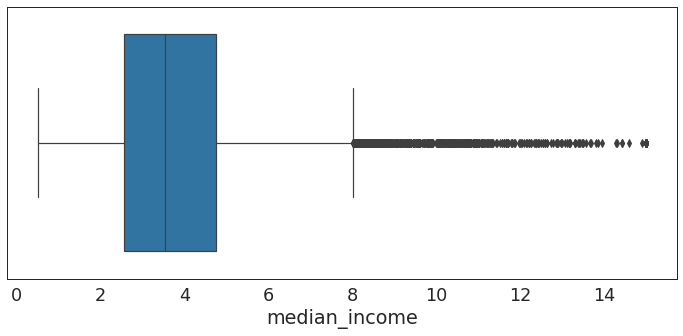

In [ ]:
#Checking the distribution of median_income using Box plot
print(housing_df["median_income"].describe(percentiles = [0.1,0,0.25,0.5,0.75,0.99]))
print()
plt.figure(figsize = [12,5])
sns.boxplot(data = housing_df,x= 'median_income')
plt.show()

**Observations:**
* Using the Box-Plot I observed that there are outliers present in the data , but we can't say that these are wrong data as high median income are possible.
* Here we can observe that mean is at 3.87061 and median is at 3.534800.
* we can say that mean > median , so data distribution is **Right-Skewed**. 
* data between 10 to 15 are outliers.

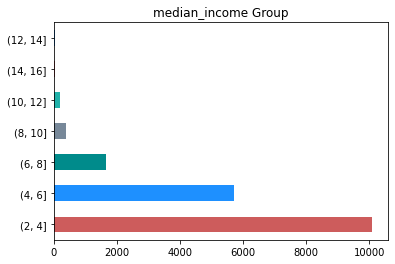

In [ ]:
# binning median_income and creating new dataframe "median_income_df"
median_income_df = pd.cut(housing_df["median_income"],bins=[2,4,6,8,10,12,14,16])
(median_income_df.value_counts()).plot.barh(title ="median_income Group", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

**Observations:**
* I have divided median_income data into gropus of bins of 2,4,6,8,10,12,14,16
* we can observe that data in median_income group of (2,4) are highest followed by (4,6).

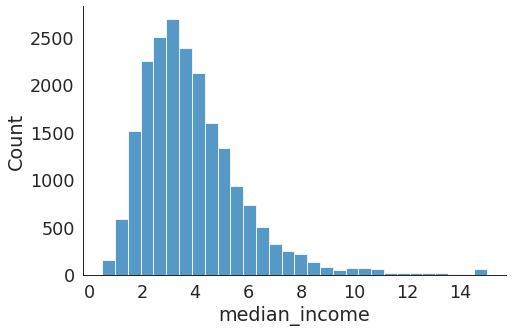

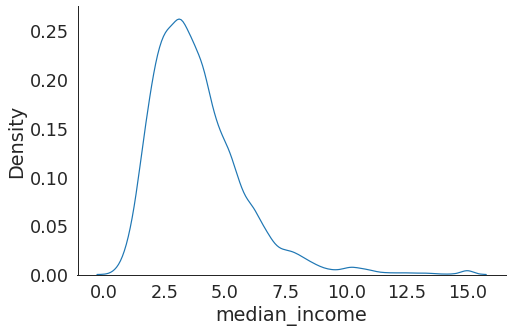

<Axes: xlabel='median_income', ylabel='Density'>

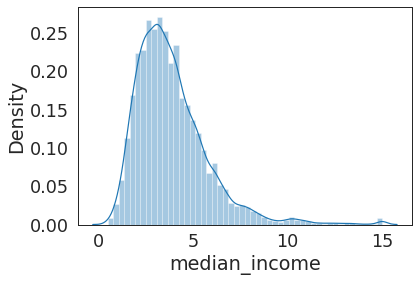

In [ ]:
#plotting Histogram and kdeplot to visualize the data distribution
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=housing_df, x="median_income", kind="hist", bins = 30, aspect = 1.5)
sns.displot(data=housing_df, x="median_income", kind="kde" , aspect = 1.5)
plt.show()
sns.distplot(housing_df['median_income'])

**Observations:**
* With the histogram plot , we can see that data is Right skewed.
* Between 2-4 there are highest count.

## **2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
0%           1.000000
10%         13.000000
25%         18.000000
50%         29.000000
75%         37.000000
99%         52.000000
max         52.000000
Name: housing_median_age, dtype: float64



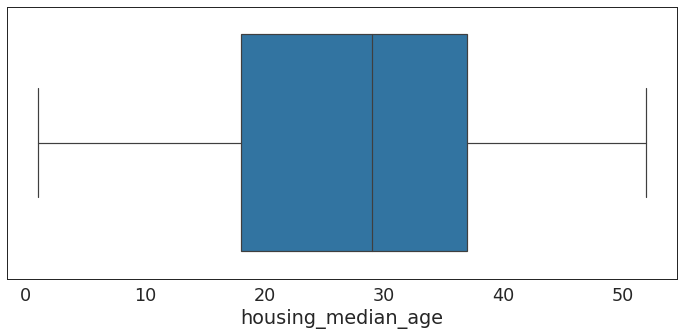

In [ ]:
#Checking the distribution of median_income using Box plot
print(housing_df["housing_median_age"].describe(percentiles = [0.1,0,0.25,0.5,0.75,0.99]))
print()
plt.figure(figsize = [12,5])
sns.boxplot(data = housing_df,x= 'housing_median_age')
plt.show()

**Observations:**
* There are no outliers.
* Mean and Median are almost close to each other.
* IQR lies between 18 to 37.

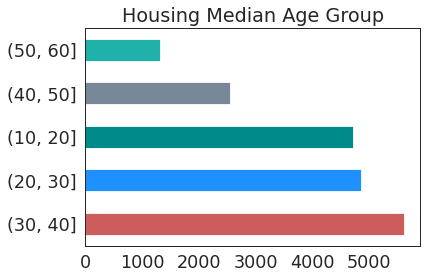

In [ ]:
# binning housing_median_age and creating new dataframe "housing_median_age_df"
housing_median_age_df = pd.cut(housing_df["housing_median_age"],bins=[10,20,30,40,50,60])
(housing_median_age_df.value_counts()).plot.barh(title ="Housing Median Age Group", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

**Observations:**
* I have divided Housing median Age into groups using bins of (10,20,30,40,50,60).
* we can see here that age group of 30-40 are maximum , followed by 20-30 and 10-20.
* Age group 50-60 are least.


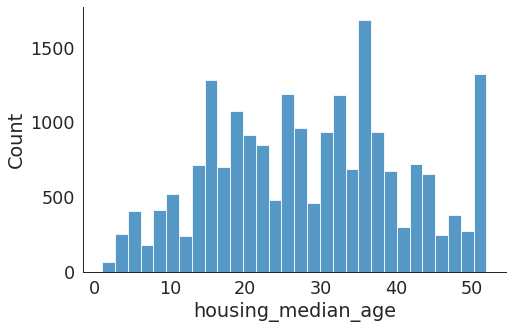

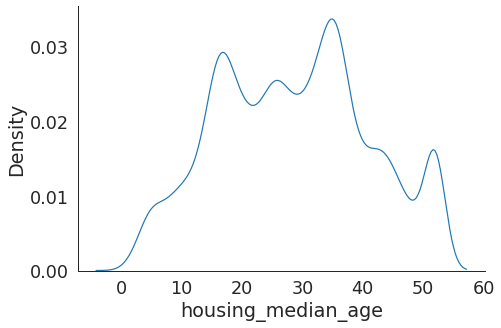

<Axes: xlabel='housing_median_age', ylabel='Density'>

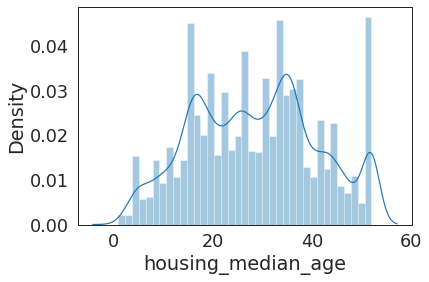

In [ ]:
#plotting histogram and kde plot to visualize the distribution of data
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=housing_df, x="housing_median_age", kind="hist", bins = 30, aspect = 1.5)
sns.displot(data=housing_df, x="housing_median_age", kind="kde" , aspect = 1.5)
plt.show()
sns.distplot(housing_df['housing_median_age'])

**Observations:**
* The Data is normally distributed.


## **3. Show with the help of visualization, how median_income and median_house_values are related?**



both of the features are of Numerical Data

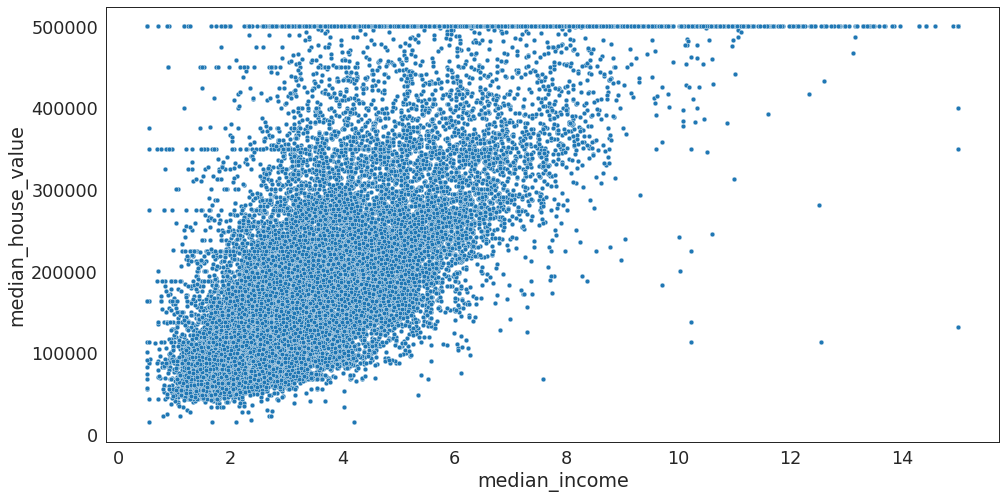

In [ ]:
plt.figure(figsize = [16,8])
sns.scatterplot(x=housing_df['median_income'] , y = housing_df['median_house_value'])
plt.show()

**Observations :**
* we can see strong positive correlation here.
* As the Median_income increases , median_house_values also increases.

## **4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**

In [ ]:
#Checking Rows in which total_bedrooms data in not available
housing_df[housing_df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


**Observations:**
* We can see here that there are **207 rows** in which total_bedrooms data is not available.


In [ ]:
#created a new dataset housing_df_new and moved all data to there except the rows containing nulls in total_bedrooms feature.
housing_df_new = housing_df[housing_df['total_bedrooms'].notna()]

In [ ]:
housing_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


**Observations:**
* we are now left with 20433 Rows.
* And now we have no null values in total_bedrooms column.

## **5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.**

In [ ]:
#finding the mean value of total_bedrooms
print(housing_df['total_bedrooms'].mean())

537.8705525375618


In [ ]:
#Checking Rows in which total_bedrooms data in not available
housing_df[housing_df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [ ]:
#filling null values with mean value 537.8705525375618 in total_bedrooms
housing_df['total_bedrooms'].fillna(value = 537.8705525375618 , inplace = True)

In [ ]:
#checking null values in total_bedrooms
housing_df[housing_df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


**Observations :**
Mean value is imputed in place of null values , and we can see that no null values are left.

## **6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.**

In [ ]:
#creating user defined function to calculate median with name median_function which will take one argument
def median_function(dataset):
  new_df = pd.Series(dataset)
  n = len(dataset)
  new_df = new_df.sort_values() 
  if n % 2 == 0:
    median1 = new_df[n//2]
    median2 = new_df[n//2 - 1]
    median = (median1 + median2)/2
  else:
    median = new_df[n//2]

  return print("Median is: ", median)

In [ ]:
#calling the function median_function with parameter housing_df['housing_median_age']
median_function(housing_df['housing_median_age'])

Median is:  12.5


In [6]:
#Another method
def median_func(a):
  return housing_df[a].median()


median_func('total_bedrooms')

435.0

## **7. Plot latitude versus longitude and explain your observations.**



In [ ]:
#installing geopandas and shapely
!pip install geopandas
!pip install Shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


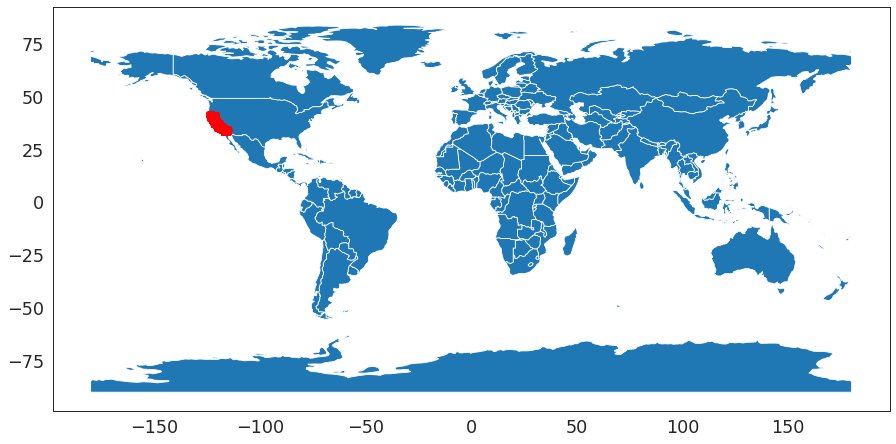

In [ ]:

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(housing_df['longitude'], housing_df['latitude'])]
gdf = GeoDataFrame(housing_df, geometry=geometry)   

#World map showing the location of latitude and longitude
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

**Observations:**
* With the help of Latitude and longitude we can identify the exact location of the House.
* we can view in map that all the housing data belongs to california state of United States of America.

## **8. Create a data set for which the ocean_proximity is ‘Near ocean’.**

In [ ]:
#Checking the number of house with NEAR OCEAN
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#fetching rows with ocean proximity NEAR OCEAN
housing_df[housing_df['ocean_proximity'] == 'NEAR OCEAN']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


We have 2658 houses with ocean proximity Near Ocean

In [ ]:
#Creating a new dataframe housing_df_NO , and storing all the housing data with ocean proximity Near Ocean
housing_df_NO = housing_df[housing_df['ocean_proximity'] == 'NEAR OCEAN']

In [ ]:
housing_df_NO

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


## **9. Find the mean and median of the median income for the data set created in question 8.**

In [ ]:
#finding the mean and median of median_income using aggregate function
housing_df_NO.agg({"median_income" : ['mean','median']})

,median_income
mean,4.005785
median,3.647050


## **10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.**

In [ ]:
#defining conditions
conditions = [
    (housing_df['total_bedrooms'] <= 10),
    (housing_df['total_bedrooms'] > 10) & (housing_df['total_bedrooms'] < 1000),
    (housing_df['total_bedrooms'] >= 1000)
]

#defining results
results = ['small', 'medium', 'large']

#create new column total_bedroom_size based on conditions in
housing_df['total_bedroom_size'] = np.select(conditions, results)

In [ ]:
# housing_df['total_bedroom_size'] = housing_df['total_bedrooms'].map(lambda x: "small" if x<=10 else if (x>10 & x<1000) "medium" else "large")

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,medium
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,medium
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,medium
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,medium


In [ ]:
housing_df['total_bedroom_size'].value_counts()

medium    18495
large      1883
0           207
small        55
Name: total_bedroom_size, dtype: int64

**Observations:**
* The medium total_bedroom_size are maximum with 18495.
* small total_bedroom_size is lowest with only 55.

## **Result:**
Working on this project I got to learn and use many concepts , like statistical concepts , analytical thinking , visualization libraries and how to find patterns in charts. One thing I learnt new while working on this project is about Geopandas and also applied on my data.

As I have done analysis using Python , I have also came to know and learn many concepts in python like seaborn and matplotlib library , various statistical concepts like univariate/bivatiate/multivariate analysis, correlation , cleaning data , imputing null values. Overall It was a great project in which I have to use all of Data analytical concepts to find useful Insights.

I have also uploaded the project on GitHub , you can check out there. GitHub Link :- https://github.com/raushanchaurasiya